In [3]:
import sys
print(sys.executable)
!"{sys.executable}" -m pip show torch
!"{sys.executable}" -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --cache-dir D:\pip-cache


d:\venvs\plants-ml\Scripts\python.exe
Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: d:\venvs\plants-ml\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: clip, torchaudio, torchvision
Looking in indexes: https://download.pytorch.org/whl/cu121


In [4]:
import sys
print(sys.executable)
print(sys.version)

d:\venvs\plants-ml\Scripts\python.exe
3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


In [5]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else None)


CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
!pip install gdown

^C


In [13]:
!gdown 1BOGeKKva4oviQs0FGfPKq2uVz20i8pd5 -O plant_disease.zip

^C


In [14]:
!unzip plant_disease.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
pd.__version__


'3.0.0'


**WITH** **MENTOR**

device(type='cuda')

In [17]:
!find . -maxdepth 5 -type d -iname "train" -o -iname "val" -o -iname "test" | head -n 200


'head' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
!find . -maxdepth 7 -type d \( -iname "healthy" -o -iname "sick" \) | head -n 200


'head' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip -q install torchvision scikit-learn pandas matplotlib tqdm pillow


CWD: d:\Repos\ml_week
Top-level folders/files:
 - .git
 - .gitignore
 - .venv
 - checkpoints
 - classify_images.md
 - classify_images.py
 - dataset_plants_final
 - logs
 - plant_disease.zip
 - plant_disease.zip1r5y3yk7.part
 - plant_disease_project.ipynb
 - pseudo
 - README.md
 - requirements.txt
 - results
 - runs
 - WORKING with clip - Copy.ipynb
 - WORKING with clip.ipynb
 - yolov8n-cls.pt
✅ Paths OK
TRAIN: D:\Repos\ml_week\dataset_plants_final\train
VAL: D:\Repos\ml_week\dataset_plants_final\val
TEST: D:\Repos\ml_week\dataset_plants_final\test


CWD: d:\Repos\ml_week
Top-level folders/files:
 - .git
 - .gitignore
 - .venv
 - checkpoints
 - classify_images.md
 - classify_images.py
 - dataset_plants_final
 - logs
 - plant_disease.zip
 - plant_disease.zip1r5y3yk7.part
 - plant_disease_project.ipynb
 - pseudo
 - README.md
 - requirements.txt
 - results
 - runs
 - WORKING with clip - Copy.ipynb
 - WORKING with clip.ipynb
 - yolov8n-cls.pt
✅ Paths OK
TRAIN: D:\Repos\ml_week\dataset_plants_final\train
VAL: D:\Repos\ml_week\dataset_plants_final\val
TEST: D:\Repos\ml_week\dataset_plants_final\test


split    class  count
0  train  healthy    169
1  train     sick    431
2    val  healthy     58
3    val     sick    142
4   test  healthy     54
5   test     sick    146

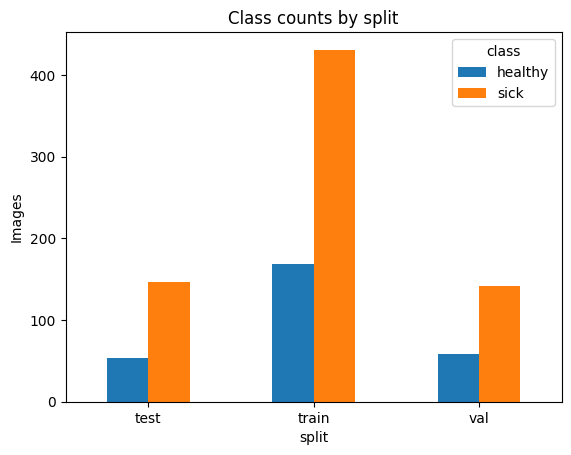

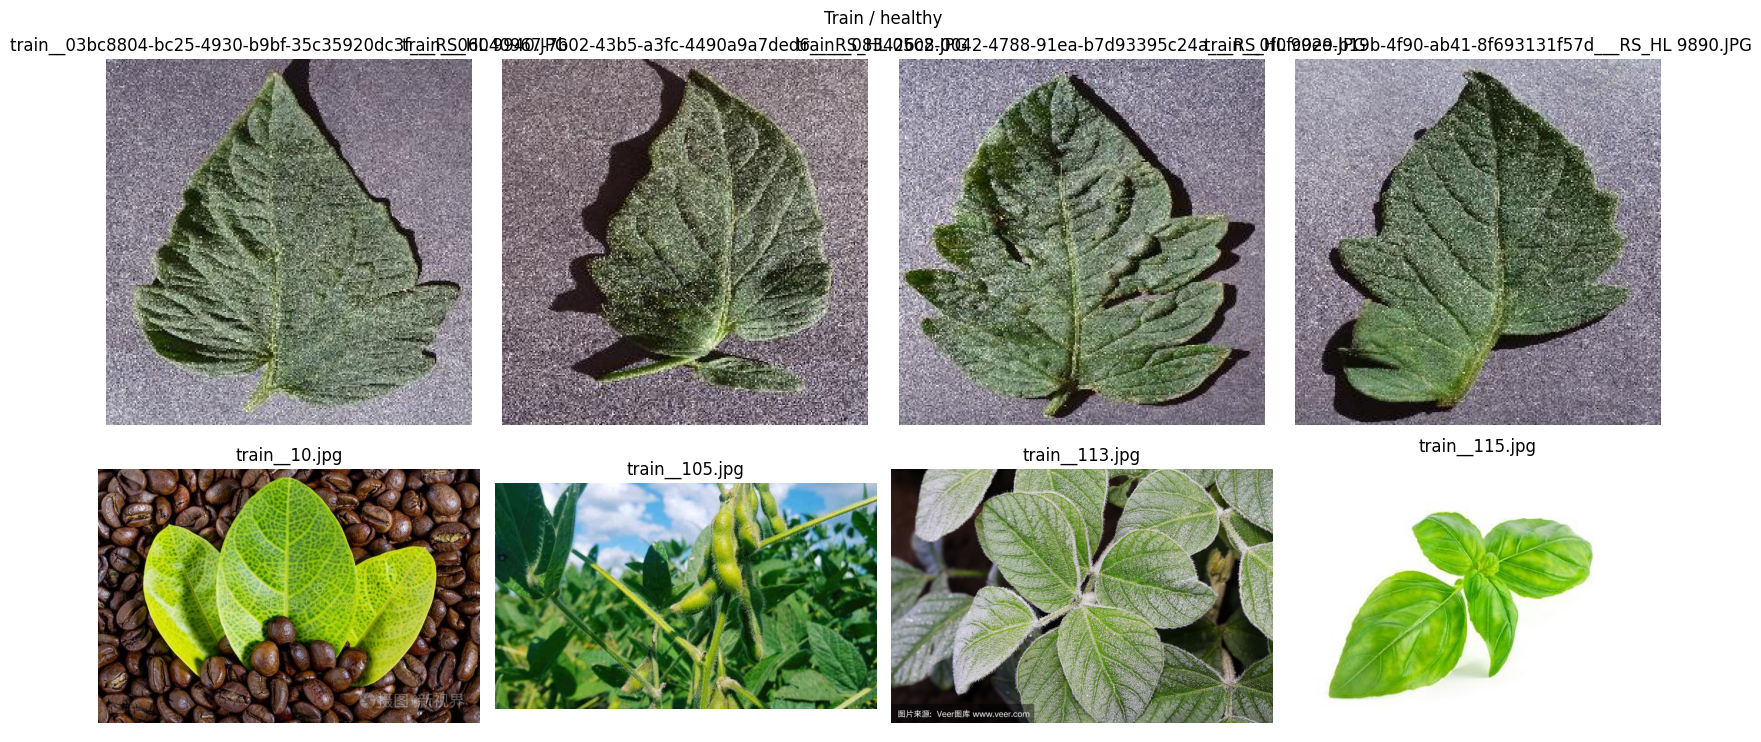

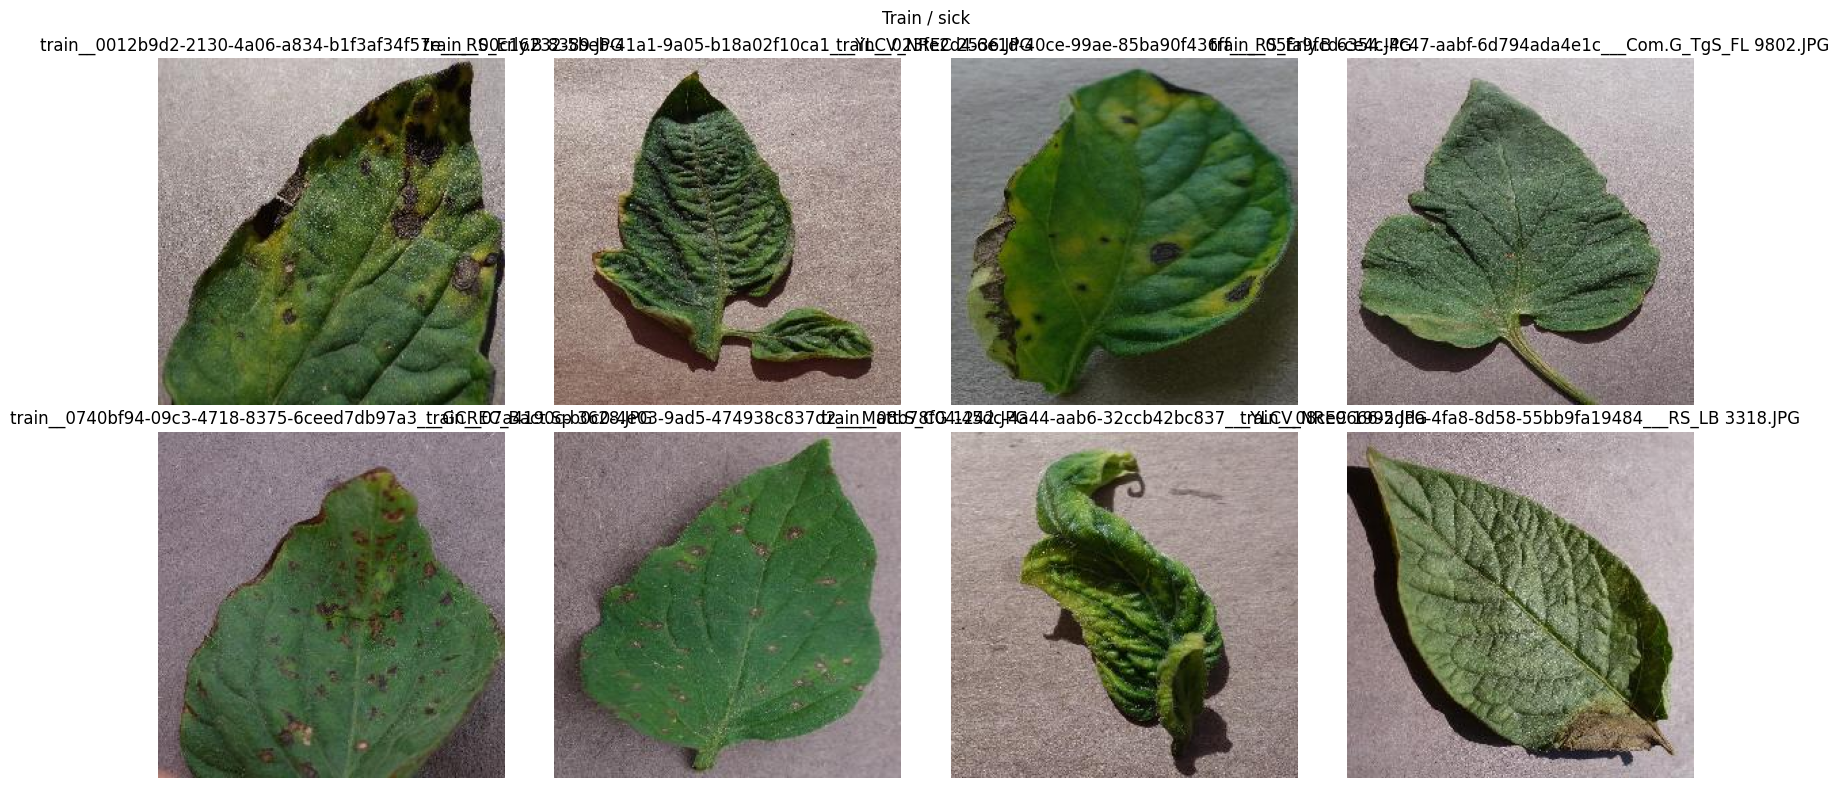

class_to_idx: {'healthy': 0, 'sick': 1}


d:\venvs\plants-ml\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\venvs\plants-ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ model ready


✅ fine-tuning config ready


CWD: d:\Repos\ml_week
Top-level folders/files:
 - .git
 - .gitignore
 - .venv
 - checkpoints
 - classify_images.md
 - classify_images.py
 - dataset_plants_final
 - logs
 - plant_disease.zip
 - plant_disease.zip1r5y3yk7.part
 - plant_disease_project.ipynb
 - pseudo
 - README.md
 - requirements.txt
 - results
 - runs
 - WORKING with clip - Copy.ipynb
 - WORKING with clip.ipynb
 - yolov8n-cls.pt
✅ Paths OK
TRAIN: D:\Repos\ml_week\dataset_plants_final\train
VAL: D:\Repos\ml_week\dataset_plants_final\val
TEST: D:\Repos\ml_week\dataset_plants_final\test


split    class  count
0  train  healthy    169
1  train     sick    431
2    val  healthy     58
3    val     sick    142
4   test  healthy     54
5   test     sick    146

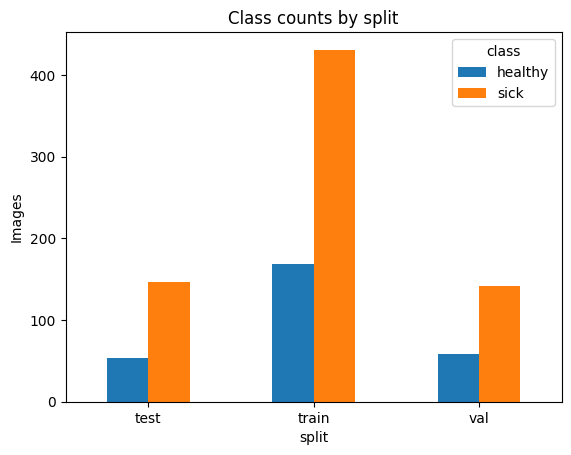

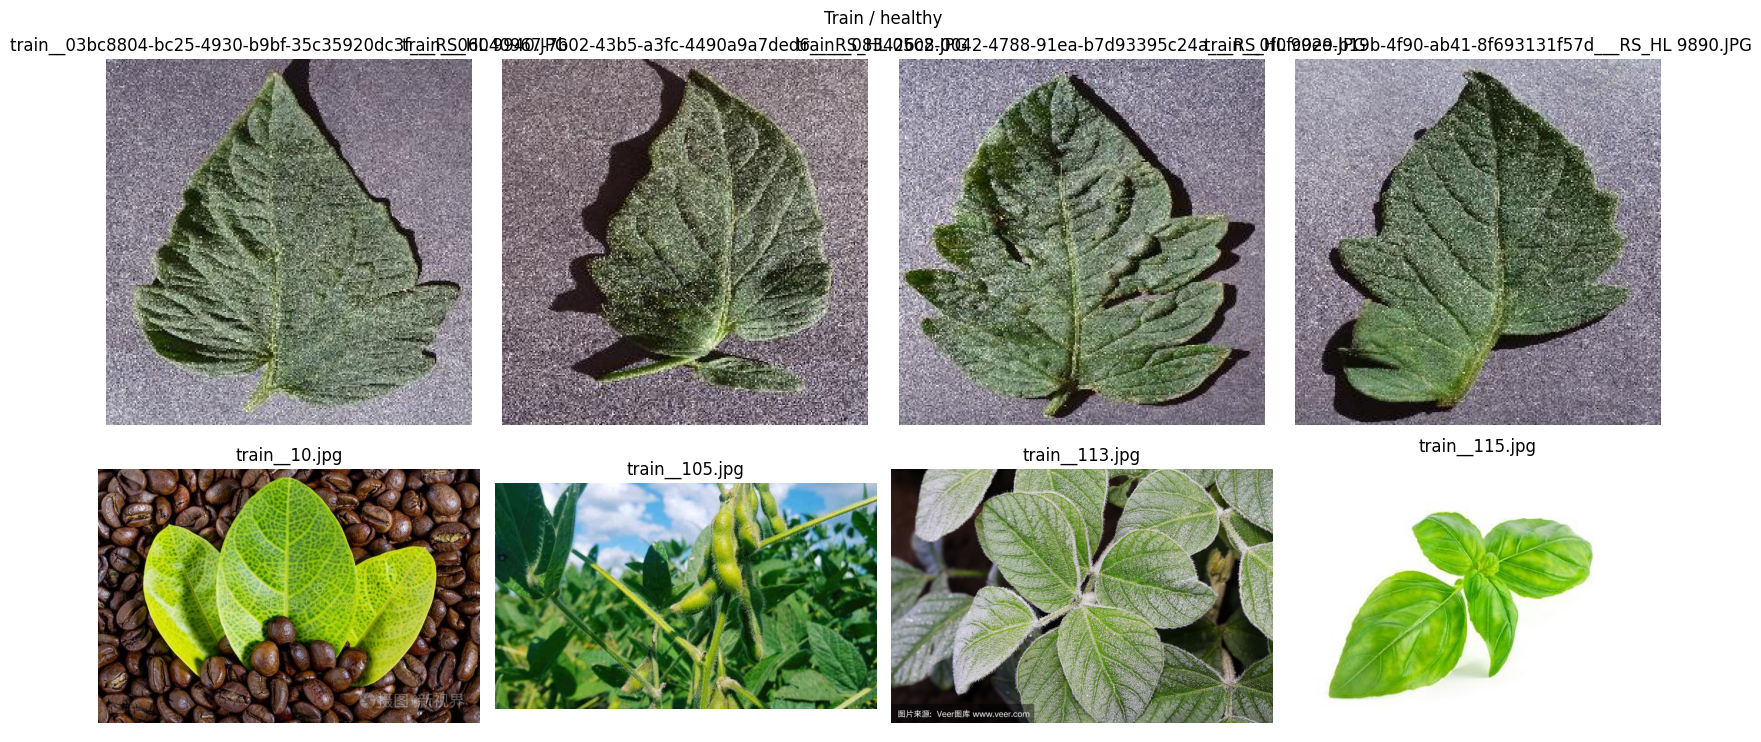

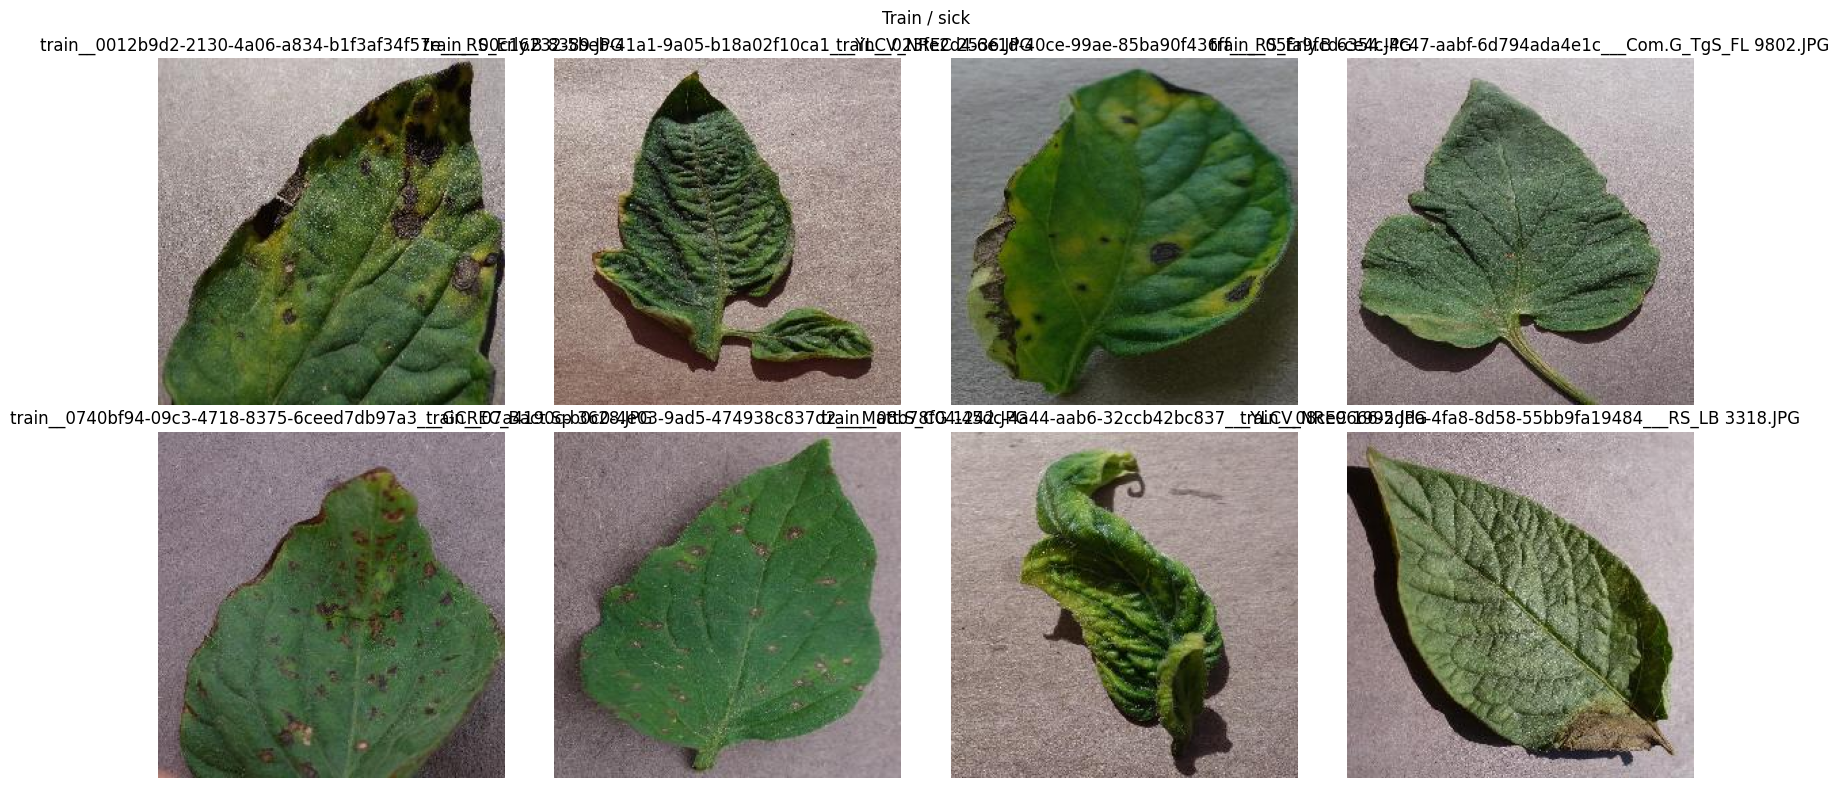

class_to_idx: {'healthy': 0, 'sick': 1}


d:\venvs\plants-ml\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\venvs\plants-ml\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ model ready
✅ fine-tuning config ready


In [3]:
# ===== Fine-tuning helpers: freeze / unfreeze =====
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torch.utils.data import DataLoader
import random, time, json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

from pathlib import Path

DATA_DIR = Path("dataset_plants_final")

TRAIN_DIR = DATA_DIR / "train"
VAL_DIR   = DATA_DIR / "val"
TEST_DIR  = DATA_DIR / "test"

from pathlib import Path
import os

print("CWD:", Path.cwd())
print("Top-level folders/files:")
for p in sorted(Path(".").iterdir()):
    print(" -", p)

from pathlib import Path


assert TRAIN_DIR.exists() and VAL_DIR.exists() and TEST_DIR.exists(), "Не бачу train/val/test у корені після unzip"
assert (TRAIN_DIR/"healthy").exists() and (TRAIN_DIR/"sick").exists(), "Не бачу train/healthy та train/sick"
assert (VAL_DIR/"healthy").exists() and (VAL_DIR/"sick").exists(), "Не бачу val/healthy та val/sick"
assert (TEST_DIR/"healthy").exists() and (TEST_DIR/"sick").exists(), "Не бачу test/healthy та test/sick"

print("✅ Paths OK")
print("TRAIN:", TRAIN_DIR.resolve())
print("VAL:", VAL_DIR.resolve())
print("TEST:", TEST_DIR.resolve())

Path("checkpoints").mkdir(exist_ok=True)
Path("results").mkdir(exist_ok=True)
Path("logs").mkdir(exist_ok=True)

IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".webp"}

def count_images(folder: Path) -> int:
    return sum(1 for p in folder.rglob("*") if p.suffix.lower() in IMG_EXTS)

rows = []
for split_name, split_dir in [("train", TRAIN_DIR), ("val", VAL_DIR), ("test", TEST_DIR)]:
    for cls in ["healthy", "sick"]:
        rows.append({"split": split_name, "class": cls, "count": count_images(split_dir/cls)})
df_counts = pd.DataFrame(rows)
display(df_counts)

pivot = df_counts.pivot(index="split", columns="class", values="count").fillna(0).astype(int)
pivot.plot(kind="bar")
plt.title("Class counts by split")
plt.ylabel("Images")
plt.xticks(rotation=0)
plt.show()

def show_samples(folder: Path, n=8, title=""):
    paths = [p for p in folder.rglob("*") if p.suffix.lower() in IMG_EXTS][:n]
    cols = min(4, len(paths))
    rows = int(np.ceil(len(paths)/cols)) if cols else 1
    plt.figure(figsize=(4*cols, 4*rows))
    for i, p in enumerate(paths, start=1):
        img = Image.open(p).convert("RGB")
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(p.name)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_samples(TRAIN_DIR/"healthy", 8, "Train / healthy")
show_samples(TRAIN_DIR/"sick", 8, "Train / sick")

IMGSZ = 224
BATCH = 32
EPOCHS = 20
LR = 1e-4
WEIGHT_DECAY = 1e-4
NUM_WORKERS = 2  # якщо будуть проблеми в Colab -> 0

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD  = (0.229, 0.224, 0.225)

train_tfms = transforms.Compose([
    transforms.Resize((IMGSZ, IMGSZ)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.15, contrast=0.15),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

eval_tfms = transforms.Compose([
    transforms.Resize((IMGSZ, IMGSZ)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

train_ds = datasets.ImageFolder(TRAIN_DIR, transform=train_tfms)
val_ds   = datasets.ImageFolder(VAL_DIR, transform=eval_tfms)
test_ds  = datasets.ImageFolder(TEST_DIR, transform=eval_tfms)

print("class_to_idx:", train_ds.class_to_idx)

train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True,  num_workers=NUM_WORKERS)
val_loader   = DataLoader(val_ds,   batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS)
test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, num_workers=NUM_WORKERS)

assert "sick" in train_ds.class_to_idx and "healthy" in train_ds.class_to_idx, "Очікую класи healthy/sick"
SICK_IDX = train_ds.class_to_idx["sick"]

def to_binary(labels: torch.Tensor) -> torch.Tensor:
    return (labels == SICK_IDX).float()

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)  # 1 logit
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

print("✅ model ready")

def set_requires_grad(module, flag: bool):
    for p in module.parameters():
        p.requires_grad = flag

def freeze_backbone_resnet(model):
    # freeze everything
    set_requires_grad(model, False)
    # unfreeze only classifier head
    set_requires_grad(model.fc, True)

def unfreeze_resnet_layer4_plus_fc(model):
    # keep most layers frozen, unfreeze last block + head
    set_requires_grad(model, False)
    set_requires_grad(model.layer4, True)
    set_requires_grad(model.fc, True)

def count_trainable_params(model):
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total = sum(p.numel() for p in model.parameters())
    return trainable, total

# Fine-tuning plan (можеш змінити числа, але логіка та сама)
EPOCHS_WARMUP = 3                  # лише fc (frozen backbone)
EPOCHS_FINETUNE = EPOCHS - EPOCHS_WARMUP  # решта епох: layer4 + fc
LR_HEAD = LR                       # як у тебе (наприклад 1e-4)
LR_BACKBONE = LR * 0.1             # менший LR для layer4 (наприклад 1e-5)
print("✅ fine-tuning config ready")

def train_one_epoch():
    model.train()
    total_loss, n = 0.0, 0

    for x, y in tqdm(train_loader, desc="train", leave=False):
        x = x.to(device)
        yb = to_binary(y.to(device)).unsqueeze(1)  # [B,1]

        optimizer.zero_grad(set_to_none=True)
        logits = model(x)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        bs = x.size(0)
        total_loss += loss.item() * bs
        n += bs

    return total_loss / max(n, 1)

@torch.no_grad()
def evaluate(loader):
    model.eval()
    all_true, all_pred = [], []
    total_loss, n = 0.0, 0

    for x, y in tqdm(loader, desc="eval", leave=False):
        x = x.to(device)
        yb = to_binary(y.to(device)).unsqueeze(1)

        logits = model(x)
        loss = criterion(logits, yb)

        probs = torch.sigmoid(logits).squeeze(1).cpu().numpy()
        preds = (probs >= 0.5).astype(int)

        all_true.append(yb.squeeze(1).cpu().numpy().astype(int))
        all_pred.append(preds)

        bs = x.size(0)
        total_loss += loss.item() * bs
        n += bs

    y_true = np.concatenate(all_true)
    y_pred = np.concatenate(all_pred)

    metrics = {
        "loss": float(total_loss / max(n,1)),
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "precision": float(precision_score(y_true, y_pred, zero_division=0)),
        "recall": float(recall_score(y_true, y_pred, zero_division=0)),
        "f1": float(f1_score(y_true, y_pred, zero_division=0)),
    }
    return metrics, y_true, y_pred


In [26]:
# ТЕСТ НА GPU
torch.cuda.is_available()

True

In [2]:
# ===== Fine-tuning training loop: warmup (fc) -> unfreeze (layer4+fc) =====

best_f1 = -1.0
history = []
epoch_global = 0

# ---- Phase A: Warmup (freeze backbone, train only fc) ----
freeze_backbone_resnet(model)
trainable, total = count_trainable_params(model)
print(f"Phase A (WARMUP): trainable params = {trainable:,}/{total:,}")

optimizer = optim.AdamW(model.parameters(), lr=LR_HEAD, weight_decay=WEIGHT_DECAY)

for _ in range(EPOCHS_WARMUP):
    epoch_global += 1
    tr_loss = train_one_epoch()
    val_metrics, _, _ = evaluate(val_loader)

    row = {
        "epoch": epoch_global,
        "phase": "warmup_fc",
        "train_loss": tr_loss,
        **{f"val_{k}": v for k, v in val_metrics.items()}
    }
    history.append(row)
    pd.DataFrame(history).to_csv("logs/train_log.csv", index=False)

    print(f"[Warmup] Epoch {epoch_global}/{EPOCHS} | train_loss={tr_loss:.4f} | val_f1={val_metrics['f1']:.4f} | val_acc={val_metrics['accuracy']:.4f}")

    if val_metrics["f1"] > best_f1:
        best_f1 = val_metrics["f1"]
        torch.save(model.state_dict(), "checkpoints/best_model.pt")
        print("✅ saved checkpoints/best_model.pt")


# ---- Phase B: Fine-tune (unfreeze layer4 + fc) ----
if EPOCHS_FINETUNE > 0:
    unfreeze_resnet_layer4_plus_fc(model)
    trainable, total = count_trainable_params(model)
    print(f"Phase B (FINETUNE): trainable params = {trainable:,}/{total:,}")

    # two param groups: smaller LR for layer4, larger for fc
    optimizer = optim.AdamW([
        {"params": model.layer4.parameters(), "lr": LR_BACKBONE},
        {"params": model.fc.parameters(), "lr": LR_HEAD},
    ], weight_decay=WEIGHT_DECAY)

    for _ in range(EPOCHS_FINETUNE):
        epoch_global += 1
        tr_loss = train_one_epoch()
        val_metrics, _, _ = evaluate(val_loader)

        row = {
            "epoch": epoch_global,
            "phase": "finetune_layer4_fc",
            "train_loss": tr_loss,
            **{f"val_{k}": v for k, v in val_metrics.items()}
        }
        history.append(row)
        pd.DataFrame(history).to_csv("logs/train_log.csv", index=False)

        print(f"[Finetune] Epoch {epoch_global}/{EPOCHS} | train_loss={tr_loss:.4f} | val_f1={val_metrics['f1']:.4f} | val_acc={val_metrics['accuracy']:.4f}")

        if val_metrics["f1"] > best_f1:
            best_f1 = val_metrics["f1"]
            torch.save(model.state_dict(), "checkpoints/best_model.pt")
            print("✅ saved checkpoints/best_model.pt")


# ---- Plots ----
df_hist = pd.DataFrame(history)

plt.figure()
plt.plot(df_hist["epoch"], df_hist["train_loss"], label="train_loss")
plt.plot(df_hist["epoch"], df_hist["val_loss"], label="val_loss")
plt.title("Loss curves")
plt.xlabel("epoch"); plt.ylabel("loss")
plt.legend(); plt.show()

plt.figure()
plt.plot(df_hist["epoch"], df_hist["val_f1"], label="val_f1")
plt.plot(df_hist["epoch"], df_hist["val_accuracy"], label="val_accuracy")
plt.title("Validation metrics")
plt.xlabel("epoch"); plt.ylabel("metric")
plt.legend(); plt.show()


NameError: name 'freeze_backbone_resnet' is not defined

In [4]:
from pathlib import Path
import shutil
import pandas as pd
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import datasets

# ---- CONFIG ----
UNLABELED_DIR = DATA_DIR / "unlabeled" / "images"
PSEUDO_ROOT   = Path("pseudo")
THRESH = 0.85              # оптимальніше для 5000 unlabeled
BATCH_SIZE_PSEUDO = 16     # якщо GPU дозволяє; якщо OOM — поверни 32
MAX_PSEUDO_MULT = 1        # 1x train_ds (рекомендовано); можна 2 для 2x
NUM_WORKERS_PSEUDO = 2     # на Windows зазвичай 0-2 стабільно


PSEUDO_ROOT.mkdir(exist_ok=True)
(PSEUDO_ROOT / "train" / "healthy").mkdir(parents=True, exist_ok=True)
(PSEUDO_ROOT / "train" / "sick").mkdir(parents=True, exist_ok=True)

assert UNLABELED_DIR.exists(), f"Не знайдено папку {UNLABELED_DIR}. Перевір шлях."
print("✅ UNLABELED_DIR:", UNLABELED_DIR.resolve())


✅ UNLABELED_DIR: D:\Repos\ml_week\dataset_plants_final\unlabeled\images


In [5]:
class UnlabeledImagesDataset(Dataset):
    def __init__(self, root_dir: Path, transform):
        self.root_dir = Path(root_dir)
        self.transform = transform
        exts = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
        self.files = sorted([p for p in self.root_dir.rglob("*") if p.suffix.lower() in exts])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        fp = self.files[idx]
        img = Image.open(fp).convert("RGB")
        x = self.transform(img)
        return x, str(fp)

unlab_ds = UnlabeledImagesDataset(UNLABELED_DIR, eval_tfms)
unlab_loader = DataLoader(
    unlab_ds,
    batch_size=BATCH_SIZE_PSEUDO,
    shuffle=False,
    num_workers=NUM_WORKERS_PSEUDO,
    pin_memory=True
)

print("✅ Unlabeled images:", len(unlab_ds))


✅ Unlabeled images: 5000


In [6]:
# ---- load best model for pseudo-labeling ----
best_path = Path("checkpoints/best_model.pt")
assert best_path.exists(), "Нема checkpoints/best_model.pt. Спочатку виконай Task 7 і збережи модель."

# якщо в тебе best_model вже є в памʼяті — використаємо його; інакше беремо model + load_state_dict
if "best_model" in globals():
    pseudo_model = best_model
else:
    pseudo_model = model
    pseudo_model.load_state_dict(torch.load(best_path, map_location=device))

pseudo_model = pseudo_model.to(device)
pseudo_model.eval()

rows = []
selected_count = 0
print("Starting pseudo-labeling...")
with torch.no_grad():
    for idx, (xb, paths) in enumerate(unlab_loader):
        if idx % 5 == 0:
            print(f"Process batch {idx}")
        xb = xb.to(device)
        logits = pseudo_model(xb).squeeze(1)
        probs = torch.sigmoid(logits).detach().cpu().numpy()  # p_sick

        for p_sick, fp in zip(probs, paths):
            p_sick = float(p_sick)
            pred = "sick" if p_sick >= 0.5 else "healthy"
            conf = max(p_sick, 1.0 - p_sick)
            keep = conf >= THRESH

            rows.append({
                "path": fp,
                "p_sick": p_sick,
                "pred": pred,
                "confidence": float(conf),
                "keep": bool(keep)
            })

df_pseudo = pd.DataFrame(rows)
df_pseudo.to_csv("results/pseudo_labels_all.csv", index=False)

df_keep = df_pseudo[df_pseudo["keep"]].copy()
df_keep.to_csv("results/pseudo_labels_selected.csv", index=False)
# ---- limit pseudo set to top-N by confidence to reduce label noise ----
MAX_PSEUDO = int(len(train_ds) * MAX_PSEUDO_MULT)  # напр. 1x train
df_keep = df_keep.sort_values("confidence", ascending=False).head(MAX_PSEUDO).copy()

df_keep.to_csv("results/pseudo_labels_selected_topN.csv", index=False)

print(f"✅ After TOP-N filter: kept={len(df_keep)} (MAX_PSEUDO={MAX_PSEUDO})")


print(f"✅ Pseudo-labeling done: total={len(df_pseudo)} | selected(conf>={THRESH})={len(df_keep)}")

# ---- copy selected files into pseudo/train/{healthy,sick} ----
copied = 0
for _, r in df_keep.iterrows():
    src = Path(r["path"])
    dst = PSEUDO_ROOT / "train" / r["pred"] / src.name

    # щоб не перезаписувати при однакових назвах
    if dst.exists():
        dst = PSEUDO_ROOT / "train" / r["pred"] / f"{src.stem}__pseudo{src.suffix}"

    shutil.copy2(src, dst)
    copied += 1

print(f"✅ Copied {copied} pseudo-labeled images into { (PSEUDO_ROOT/'train').resolve() }")
df_keep.head()


C:\Users\Nazar\AppData\Local\Temp\ipykernel_2340\789747137.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pseudo_model.load_state_dict(torch.load(best_path, map_locati

Starting pseudo-labeling...


KeyboardInterrupt: 

In [ ]:
# ============================
# 8.4 Expanded Retraining (train + pseudo) — optimized for ~5000 unlabeled
# Schedule: 1 epoch warmup (fc only) + 2 epochs finetune (layer4 + fc)
# ============================

from torchvision import datasets
from torch.utils.data import DataLoader, ConcatDataset
import pandas as pd

# ---- build pseudo dataset as ImageFolder (structure already exists) ----
pseudo_ds = datasets.ImageFolder(root=str(PSEUDO_ROOT / "train"), transform=train_tfms)

print("Pseudo classes:", pseudo_ds.classes)
assert set(pseudo_ds.classes) == {"healthy", "sick"}, "Очікуються папки pseudo/train/healthy та pseudo/train/sick"

# ---- expanded dataset = original train + pseudo ----
train_ds_expanded = ConcatDataset([train_ds, pseudo_ds])

train_loader_expanded = DataLoader(
    train_ds_expanded,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"✅ Expanded train size: {len(train_ds_expanded)} (train={len(train_ds)} + pseudo={len(pseudo_ds)})")

# ---- retraining schedule ----
EPOCHS_EXPANDED_WARMUP = 1   # only fc
EPOCHS_EXPANDED_TUNE   = 2   # layer4 + fc

history_exp = []

# IMPORTANT: train_one_epoch() reads global train_loader
train_loader_backup = train_loader
train_loader = train_loader_expanded

# ===== Phase 1: Warmup on expanded set (freeze backbone, train only fc) =====
freeze_backbone_resnet(model)
optimizer = optim.AdamW(model.parameters(), lr=LR_HEAD, weight_decay=WEIGHT_DECAY)

for ep in range(1, EPOCHS_EXPANDED_WARMUP + 1):
    tr_loss = train_one_epoch()
    val_metrics, _, _ = evaluate(val_loader)

    history_exp.append({
        "epoch": ep,
        "phase": "expanded_warmup_fc",
        "train_loss": tr_loss,
        **{f"val_{k}": v for k, v in val_metrics.items()}
    })

    print(f"[Expanded Warmup] epoch {ep}/{EPOCHS_EXPANDED_WARMUP} | "
          f"train_loss={tr_loss:.4f} | val_f1={val_metrics['f1']:.4f} | val_acc={val_metrics['accuracy']:.4f}")

# ===== Phase 2: Fine-tune on expanded set (unfreeze layer4 + fc) =====
unfreeze_resnet_layer4_plus_fc(model)

optimizer = optim.AdamW([
    {"params": model.layer4.parameters(), "lr": LR_BACKBONE},
    {"params": model.fc.parameters(), "lr": LR_HEAD},
], weight_decay=WEIGHT_DECAY)

for ep2 in range(1, EPOCHS_EXPANDED_TUNE + 1):
    epoch_num = EPOCHS_EXPANDED_WARMUP + ep2

    tr_loss = train_one_epoch()
    val_metrics, _, _ = evaluate(val_loader)

    history_exp.append({
        "epoch": epoch_num,
        "phase": "expanded_finetune_layer4_fc",
        "train_loss": tr_loss,
        **{f"val_{k}": v for k, v in val_metrics.items()}
    })

    print(f"[Expanded Finetune] epoch {ep2}/{EPOCHS_EXPANDED_TUNE} | "
          f"train_loss={tr_loss:.4f} | val_f1={val_metrics['f1']:.4f} | val_acc={val_metrics['accuracy']:.4f}")

# restore original train_loader
train_loader = train_loader_backup

pd.DataFrame(history_exp).to_csv("logs/expanded_retrain_log.csv", index=False)
print("✅ Saved logs/expanded_retrain_log.csv")


: 

: 

# FINAL TEST

In [ ]:
# ===== Final TEST evaluation (using best_model.pt) =====

best_path = "checkpoints/best_model.pt"
assert Path(best_path).exists(), "Не знайдено best_model.pt"

best_model = models.resnet18(pretrained=True)
best_model.fc = nn.Linear(best_model.fc.in_features, 1)
best_model.load_state_dict(torch.load(best_path, map_location=device))
best_model = best_model.to(device)
model = best_model  # evaluate() uses global model

test_metrics, y_true, y_pred = evaluate(test_loader)
print("TEST metrics:", test_metrics)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix (test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["healthy(0)", "sick(1)"])
plt.yticks([0,1], ["healthy(0)", "sick(1)"])
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.tight_layout()
plt.savefig("results/confusion_matrix.png", dpi=150)
plt.show()


NameError: name 'Path' is not defined

: 

: 

: 

: 

: 

---

In [ ]:
@torch.no_grad()
def benchmark(loader, iters=100):
    model.eval()

    # warmup
    for i, (x, _) in enumerate(loader):
        x = x.to(device)
        _ = model(x)
        if device.type == "cuda":
            torch.cuda.synchronize()
        if i >= 5:
            break

    n_images = 0
    t0 = time.perf_counter()
    for i, (x, _) in enumerate(loader):
        x = x.to(device)
        _ = model(x)
        if device.type == "cuda":
            torch.cuda.synchronize()
        n_images += x.size(0)
        if i >= iters:
            break
    t1 = time.perf_counter()

    total = t1 - t0
    latency_ms = (total / n_images) * 1000
    throughput = n_images / total
    return latency_ms, throughput

test_loader_b1 = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=NUM_WORKERS)
lat_ms, thr = benchmark(test_loader_b1, iters=100)

print(f"Benchmark batch=1: latency={lat_ms:.2f} ms/img | throughput={thr:.2f} img/s")

# update payload + save again
payload["latency_ms_per_image_batch1"] = float(lat_ms)
payload["throughput_img_s_batch1"] = float(thr)



# with open("results/metrics.json", "w", encoding="utf-8") as f:
#     json.dump(payload, f, ensure_ascii=False, indent=2)
# pd.DataFrame([payload]).to_csv("results/metrics.csv", index=False)

# print("✅ updated speed in results/metrics.json/csv")


Benchmark batch=1: latency=85.33 ms/img | throughput=11.72 img/s


: 

: 

: 

: 

: 

# **CLIP METHOD**

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\nazar\appdata\local\temp\pip-req-build-hv0t_81q
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369632 sha256=90ddf66b2095925f296301024257c0c01bae414d0274f3844cd2442c8798f603
  Stored in directory: C:\Users\Nazar\AppData\Local\Temp\pip-ephem-wheel-cache-9u066a4v\wheels\3f\7c\a4\9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip

   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [ftfy]
   ------------- --------------

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Nazar\AppData\Local\Temp\pip-req-build-hv0t_81q'


: 

: 

: 

: 

: 

In [ ]:
# === ВИПРАВЛЕНИЙ БЛОК CLIP ZERO-SHOT ===
import os
import torch
import clip
from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score

print("\n--- Starting CLIP Zero-Shot Evaluation ---")

# 0. Налаштування (щоб уникнути NameError)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Перевірка наявності payload (якщо запускаєте окремо)
if 'payload' not in globals():
    payload = {}
    print("Створено нову змінну payload.")

# 1. Завантаження моделі CLIP
model_clip, preprocess_clip = clip.load("ViT-B/32", device=device)

# 2. Розумний пошук даних
# Спочатку шукаємо точний шлях, потім скануємо
target_folder = "test"
dataset_root_name = "dataset_plants_final"
clip_data_path = None

# Варіант А: Стандартний шлях
if os.path.exists(os.path.join(dataset_root_name, target_folder)):
    clip_data_path = os.path.join(dataset_root_name, target_folder)
# Варіант Б: Просто папка test у корені
elif os.path.exists(target_folder):
    clip_data_path = target_folder
# Варіант В: Рекурсивний пошук (але шукаємо папку test, яка лежить поруч з train)
else:
    print(f"Папка {target_folder} не знайдена за стандартним шляхом. Шукаю...")
    for root, dirs, files in os.walk("."):
        if target_folder in dirs:
            candidate_path = os.path.join(root, target_folder)
            # Перевірка: це справді датасет? (має бути папка train поруч або класи всередині)
            parent = os.path.dirname(candidate_path)
            if "train" in os.listdir(parent):
                clip_data_path = candidate_path
                break

    # Якщо все ще не знайдено, пробуємо останній шанс - будь-яку папку test
    if clip_data_path is None:
        for root, dirs, files in os.walk("."):
            if target_folder in dirs:
                clip_data_path = os.path.join(root, target_folder)
                break

if clip_data_path is None:
    raise FileNotFoundError("❌ Не вдалося знайти папку 'test'. Перевірте, чи розпаковано архів!")

print(f"✅ CLIP reading images from: {clip_data_path}")

# Створюємо DataLoader
try:
    clip_test_ds = datasets.ImageFolder(root=clip_data_path, transform=preprocess_clip)
    clip_loader = DataLoader(clip_test_ds, batch_size=32, shuffle=False, num_workers=2)
except Exception as e:
    print(f"Помилка при створенні DataLoader: {e}")
    # Можливо, папка порожня або не має підпапок класів
    raise

# 3. Prompt Engineering
clip_classes = clip_test_ds.classes
print(f"CLIP Classes: {clip_classes}")

text_prompts = [f"a photo of a {c} leaf" for c in clip_classes]
text_inputs = clip.tokenize(text_prompts).to(device)

# 4. Інференс
all_preds_clip = []
all_labels_clip = []

model_clip.eval()
with torch.no_grad():
    for images, labels in clip_loader:
        images = images.to(device)
        labels = labels.to(device)

        image_features = model_clip.encode_image(images)
        text_features = model_clip.encode_text(text_inputs)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        _, indices = similarity.topk(1)

        all_preds_clip.extend(indices.squeeze().cpu().numpy())
        all_labels_clip.extend(labels.cpu().numpy())

# 5. Результати
clip_acc = accuracy_score(all_labels_clip, all_preds_clip)
clip_f1 = f1_score(all_labels_clip, all_preds_clip, average='weighted')

print(f"✅ CLIP Zero-Shot Accuracy: {clip_acc:.4f}")
print(f"✅ CLIP Zero-Shot F1: {clip_f1:.4f}")

# 6. Збереження
payload["clip_zeroshot_accuracy"] = float(clip_acc)
payload["clip_zeroshot_f1"] = float(clip_f1)
print("Результати успішно додано до payload.")


--- Starting CLIP Zero-Shot Evaluation ---
Using device: cuda


100%|███████████████████████████████████████| 338M/338M [00:32<00:00, 10.9MiB/s]


✅ CLIP reading images from: dataset_plants_final\test
CLIP Classes: ['healthy', 'sick']
✅ CLIP Zero-Shot Accuracy: 0.8250
✅ CLIP Zero-Shot F1: 0.8325
Результати успішно додано до payload.


: 

: 

: 

: 

: 

# final updating

In [ ]:
with open("results/metrics.json", "w", encoding="utf-8") as f:
    json.dump(payload, f, ensure_ascii=False, indent=2)
pd.DataFrame([payload]).to_csv("results/metrics.csv", index=False)

print("✅ updated speed in results/metrics.json/csv")


✅ updated speed in results/metrics.json/csv


: 

: 

: 

: 

: 

In [ ]:
# === FINAL: per-image predictions on /test + counts (ResNet + CLIP) ===
import os
import json
import numpy as np
import pandas as pd
import torch
from torchvision import datasets
from torch.utils.data import DataLoader

os.makedirs("results", exist_ok=True)

# -------------------------
# 1) RESNET (your trained model)
# -------------------------
# вибираємо модель: якщо є best_model — беремо її, інакше model
resnet_model = best_model if "best_model" in globals() else model
resnet_model.eval()

# test dataset with file paths
resnet_test_ds = datasets.ImageFolder(root=str(TEST_DIR), transform=eval_tfms)
resnet_test_loader = DataLoader(resnet_test_ds, batch_size=32, shuffle=False, num_workers=NUM_WORKERS)

idx_to_class = {v:k for k,v in resnet_test_ds.class_to_idx.items()}
true_names = [idx_to_class[y] for (_, y) in resnet_test_ds.samples]
paths = [p for (p, _) in resnet_test_ds.samples]

all_probs = []
all_pred_idx = []

with torch.no_grad():
    for x, y in resnet_test_loader:
        x = x.to(device)
        logits = resnet_model(x)
        probs = torch.sigmoid(logits).squeeze(1).cpu().numpy()   # prob of "sick" because you trained binary
        pred_is_sick = (probs >= 0.5).astype(int)

        # convert to original class indices
        # if pred_is_sick=1 -> SICK_IDX else -> the other class index
        other_idx = [i for i in resnet_test_ds.class_to_idx.values() if i != SICK_IDX][0]
        pred_idx = np.where(pred_is_sick == 1, SICK_IDX, other_idx)

        all_probs.extend(probs.tolist())
        all_pred_idx.extend(pred_idx.tolist())

pred_names = [idx_to_class[i] for i in all_pred_idx]
correct = [t == p for t, p in zip(true_names, pred_names)]

df_resnet = pd.DataFrame({
    "path": paths,
    "true": true_names,
    "pred": pred_names,
    "prob_sick": all_probs,
    "correct": correct
})

resnet_correct = int(df_resnet["correct"].sum())
resnet_wrong   = int((~df_resnet["correct"]).sum())

print("\n=== RESNET on test ===")
print(f"Correct: {resnet_correct} | Wrong: {resnet_wrong} | Total: {len(df_resnet)}")

# короткий список "де здорові/де хворі" (по прогнозу)
print("\nRESNET predicted HEALTHY files:")
print("\n".join(df_resnet[df_resnet["pred"] == "healthy"]["path"].head(20).tolist()))
print("\nRESNET predicted SICK files:")
print("\n".join(df_resnet[df_resnet["pred"] == "sick"]["path"].head(20).tolist()))

df_resnet.to_csv("results/predictions_resnet_test.csv", index=False)


# -------------------------
# 2) CLIP (zero-shot) per-image predictions
# -------------------------
# якщо твій clip_test_ds вже створений — використаємо його; якщо ні, створимо з test/
if "clip_test_ds" not in globals():
    clip_test_ds = datasets.ImageFolder(root=str(TEST_DIR), transform=preprocess_clip)

clip_loader = DataLoader(clip_test_ds, batch_size=32, shuffle=False, num_workers=NUM_WORKERS)

clip_idx_to_class = {v:k for k,v in clip_test_ds.class_to_idx.items()}
clip_true_names = [clip_idx_to_class[y] for (_, y) in clip_test_ds.samples]
clip_paths = [p for (p, _) in clip_test_ds.samples]

# prompts as in your notebook
clip_classes = clip_test_ds.classes
text_prompts = [f"a photo of a {c} leaf" for c in clip_classes]
text_inputs = clip.tokenize(text_prompts).to(device)

clip_preds_idx = []

model_clip.eval()
with torch.no_grad():
    for images, labels in clip_loader:
        images = images.to(device)

        image_features = model_clip.encode_image(images)
        text_features  = model_clip.encode_text(text_inputs)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features  /= text_features.norm(dim=-1, keepdim=True)

        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        pred = similarity.argmax(dim=-1).cpu().numpy().tolist()
        clip_preds_idx.extend(pred)

clip_pred_names = [clip_idx_to_class[i] for i in clip_preds_idx]
clip_correct = [t == p for t, p in zip(clip_true_names, clip_pred_names)]

df_clip = pd.DataFrame({
    "path": clip_paths,
    "true": clip_true_names,
    "pred": clip_pred_names,
    "correct": clip_correct
})

clip_correct_n = int(df_clip["correct"].sum())
clip_wrong_n   = int((~df_clip["correct"]).sum())

print("\n=== CLIP on test ===")
print(f"Correct: {clip_correct_n} | Wrong: {clip_wrong_n} | Total: {len(df_clip)}")

print("\nCLIP predicted HEALTHY files:")
print("\n".join(df_clip[df_clip["pred"] == "healthy"]["path"].head(20).tolist()))
print("\nCLIP predicted SICK files:")
print("\n".join(df_clip[df_clip["pred"] == "sick"]["path"].head(20).tolist()))

df_clip.to_csv("results/predictions_clip_test.csv", index=False)


# -------------------------
# 3) Save summary to payload + JSON
# -------------------------
if "payload" not in globals():
    payload = {}

payload.update({
    "resnet_test_correct": resnet_correct,
    "resnet_test_wrong": resnet_wrong,
    "resnet_test_total": int(len(df_resnet)),
    "clip_test_correct": clip_correct_n,
    "clip_test_wrong": clip_wrong_n,
    "clip_test_total": int(len(df_clip)),
})

with open("results/final_counts.json", "w", encoding="utf-8") as f:
    json.dump(payload, f, ensure_ascii=False, indent=2)

print("\n✅ Saved:")
print(" - results/predictions_resnet_test.csv")
print(" - results/predictions_clip_test.csv")
print(" - results/final_counts.json")



=== RESNET on test ===
Correct: 189 | Wrong: 11 | Total: 200

RESNET predicted HEALTHY files:
dataset_plants_final\test\healthy\test__0414429e-4295-4216-b2ed-96b21cb35928___JR_HL 8250.JPG
dataset_plants_final\test\healthy\test__101.jpg
dataset_plants_final\test\healthy\test__103.jpg
dataset_plants_final\test\healthy\test__109.jpg
dataset_plants_final\test\healthy\test__124.jpg
dataset_plants_final\test\healthy\test__136.jpg
dataset_plants_final\test\healthy\test__14765754-33b2-427b-8583-05d8604384e1___JR_HL 5891.JPG
dataset_plants_final\test\healthy\test__158.jpg
dataset_plants_final\test\healthy\test__175.jpg
dataset_plants_final\test\healthy\test__195.jpg
dataset_plants_final\test\healthy\test__205.jpg
dataset_plants_final\test\healthy\test__211.jpg
dataset_plants_final\test\healthy\test__220.jpg
dataset_plants_final\test\healthy\test__264.jpg
dataset_plants_final\test\healthy\test__27.jpg
dataset_plants_final\test\healthy\test__28.jpg
dataset_plants_final\test\healthy\test__29.jpg


: 

: 

: 

: 

: 